In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Data

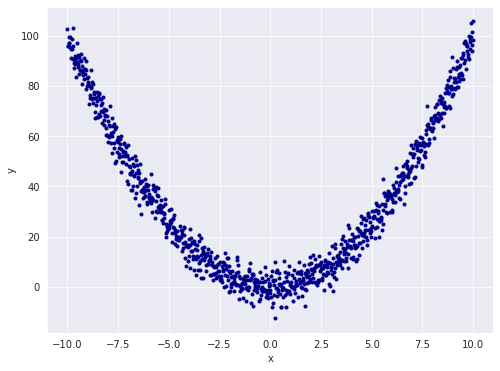

In [ ]:
x = np.linspace(-10,10,1000) 
y = [(i**2)+4*np.random.randn() for i in x] #f1

data = pd.DataFrame({'x':x,'y':y})

def graficar(x,y):
    sns.set_style("darkgrid")
    plt.figure(figsize=(8,6))
    plt.plot(x,y,'.',c='darkblue')
    plt.axis('auto')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

graficar(data['x'],data['y'])

In [ ]:
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

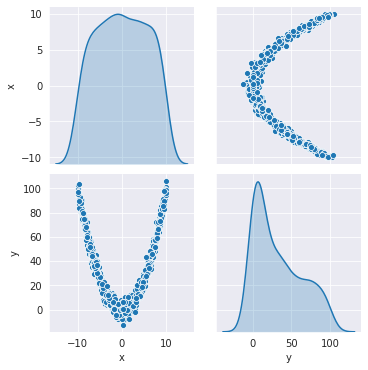

In [ ]:
sns.pairplot(train_dataset, diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("y")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
x,700.0,0.125526,5.739569,-10.0,-4.73974,0.04004,5.02002,10.0


In [ ]:
train_labels = train_dataset.pop('y')
test_labels = test_dataset.pop('y')

## Normalización

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Modelo 1

Red con una capa oculta

In [ ]:
optimizers = ['Adam','RMSprop','SGD','Adagrad','Nadam']
#optimizers = ['Adam','RMSprop','SGD','Adagrad','Nadam','Adadelta','Adamax']
l_hist = []
l_mae_train = []
l_mae_test = []
l_rsq_train = []
l_rsq_test = []
l_epoch = []
l_tiempo = []
l_opt = []
# Cantidad de neuronas por capa
n = 128
# Cantidad de iteraciones
N = 10
for i in range(N):
    for opt in optimizers:
        print(f"Optimizador: {opt}, {i+1}")
        model = Sequential() 
        model.add(Dense(n, activation='relu', input_shape=[len(train_dataset.keys())]))
        model.add(Dense(1))

        model.compile(loss='mse',optimizer=opt,metrics=['mae', 'mse'])

        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        start_time = time()
        history = model.fit(
            normed_train_data, train_labels,
            epochs=1000, validation_split = 0.2, verbose=0,
            batch_size = 64,
            callbacks=[early_stop],
            )
        time_ex = time() - start_time

        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        hist['optimizer'] = str(opt)
        l_hist.append(hist)
        # Predicciones
        test_predictions = model.predict(normed_test_data).flatten()
        train_predictions = model.predict(normed_train_data).flatten()
        # Score        
        #mse_test = mean_squared_error(test_labels, test_predictions)
        mae_train = mean_absolute_error(train_labels,train_predictions) 
        mae_test = mean_absolute_error(test_labels, test_predictions)
        rsq_train = r2_score(train_labels,train_predictions) 
        rsq_test = r2_score(test_labels,test_predictions) 
        # Listas
        l_mae_train.append(mae_train)
        l_mae_test.append(mae_test)
        l_rsq_train.append(rsq_train)
        l_rsq_test.append(rsq_test)
        l_epoch.append(hist.shape[0])
        l_tiempo.append(time_ex)
        l_opt.append(opt)

Optimizador: Adam, 1
Optimizador: RMSprop, 1
Optimizador: SGD, 1
Optimizador: Adagrad, 1
Optimizador: Nadam, 1
Optimizador: Adam, 2
Optimizador: RMSprop, 2
Optimizador: SGD, 2
Optimizador: Adagrad, 2
Optimizador: Nadam, 2
Optimizador: Adam, 3
Optimizador: RMSprop, 3
Optimizador: SGD, 3
Optimizador: Adagrad, 3
Optimizador: Nadam, 3
Optimizador: Adam, 4
Optimizador: RMSprop, 4
Optimizador: SGD, 4
Optimizador: Adagrad, 4
Optimizador: Nadam, 4
Optimizador: Adam, 5
Optimizador: RMSprop, 5
Optimizador: SGD, 5
Optimizador: Adagrad, 5
Optimizador: Nadam, 5
Optimizador: Adam, 6
Optimizador: RMSprop, 6
Optimizador: SGD, 6
Optimizador: Adagrad, 6
Optimizador: Nadam, 6
Optimizador: Adam, 7
Optimizador: RMSprop, 7
Optimizador: SGD, 7
Optimizador: Adagrad, 7
Optimizador: Nadam, 7
Optimizador: Adam, 8
Optimizador: RMSprop, 8
Optimizador: SGD, 8
Optimizador: Adagrad, 8
Optimizador: Nadam, 8
Optimizador: Adam, 9
Optimizador: RMSprop, 9
Optimizador: SGD, 9
Optimizador: Adagrad, 9
Optimizador: Nadam, 9
O

## Tabla

In [ ]:
data = pd.DataFrame({'optimizador':l_opt,                     
                     'mae_train':l_mae_train,
                     'mae_test':l_mae_test,
                     'rsq_train':l_rsq_train,
                     'rsq_test':l_rsq_test,
                     'tiempo':l_tiempo,
                     'epochs':l_epoch})

data.to_excel('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/data_optimizers_regr.xlsx',index=False)
data.style.background_gradient(cmap='Spectral')

,optimizador,mae_train,mae_test,rsq_train,rsq_test,tiempo,epochs
0,Adam,3.365180,3.228644,0.980789,0.981107,12.094421,883
1,RMSprop,3.384905,3.248187,0.980649,0.980990,6.774220,505
2,SGD,3.460628,3.282546,0.979827,0.980495,1.031949,60
3,Adagrad,6.789296,6.555516,0.923474,0.923078,12.752724,1000
4,Nadam,3.363242,3.236155,0.980817,0.981056,7.467757,520
5,Adam,3.385748,3.251288,0.980675,0.980887,10.339959,774
6,RMSprop,3.384125,3.236829,0.980647,0.981000,5.975830,441
7,SGD,3.543853,3.357574,0.978854,0.979583,0.777471,39
8,Adagrad,6.943333,6.734617,0.920230,0.919316,12.997343,1000
9,Nadam,3.360812,3.241152,0.980814,0.980980,7.385510,525


In [ ]:
data_hist = l_hist[:5][0]
for i in range(4):
    data_hist = data_hist.append(l_hist[:5][i+1], ignore_index = True) 
data_hist.to_excel('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/hist_optimizers_regr.xlsx',index=False)
data_hist

,val_loss,val_mae,val_mse,loss,mae,mse,epoch,optimizer
0,1869.337106,31.665304,1869.337036,2027.568052,33.786388,2027.568115,0,Adam
1,1854.968795,31.512217,1854.968750,2011.629862,33.620308,2011.629883,1,Adam
2,1840.285460,31.354956,1840.285522,1996.015824,33.453266,1996.015869,2,Adam
3,1825.489872,31.195894,1825.489868,1979.704213,33.280945,1979.704224,3,Adam
4,1810.181477,31.029600,1810.181519,1963.454405,33.108753,1963.454468,4,Adam
...,...,...,...,...,...,...,...,...
2963,17.368740,3.372738,17.368740,17.744109,3.363991,17.744110,515,Nadam
2964,17.339365,3.372319,17.339365,17.786961,3.373371,17.786959,516,Nadam
2965,17.350908,3.373142,17.350908,17.774370,3.366927,17.774370,517,Nadam
2966,17.356968,3.373128,17.356968,17.799434,3.373033,17.799435,518,Nadam


## Gráfico

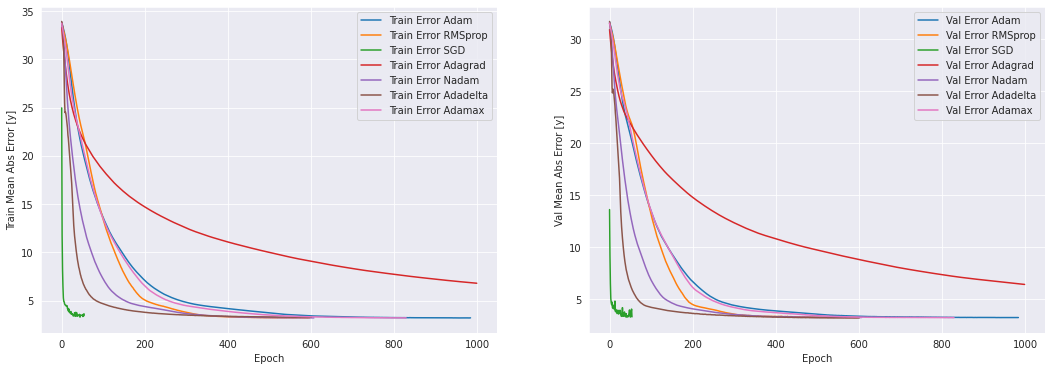

In [ ]:
def plot_history(l_hist):
    r = 1.2
    colors = ['red','blue','green']
    fig, axs = plt.subplots(1,2,figsize=(r*15,r*5)) 
  
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Train Mean Abs Error [y]')
    for i in range(len(l_hist)):
        axs[0].plot(l_hist[i]['epoch'], l_hist[i]['mae'],label='Train Error '+l_hist[i]['optimizer'][0],ls='-')
    axs[0].legend()
    #axs[0].set_yscale("log")

    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Val Mean Abs Error [y]')
    for i in range(len(l_hist)):
        axs[1].plot(l_hist[i]['epoch'], l_hist[i]['val_mae'],label = 'Val Error '+l_hist[i]['optimizer'][0],ls='-')
    axs[1].legend()
    #axs[1].set_yscale("log")

    plt.savefig('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/img_regr.png')
    plt.show()

#plot_history(l_hist)

# Modelo 2

Red con 2 capas ocultas

In [ ]:
optimizers = ['Adam','RMSprop','SGD','Adagrad','Nadam']
l_opt = []
l_hist = []
l_mae_train = []
l_mae_test = []
l_rsq_train = []
l_rsq_test = []
l_epoch = []
l_tiempo = []
# Cantidad de neuronas por capa
n = 64
# Cantidad de iteraciones
N = 10
for i in range(N):
    for opt in optimizers:
        model = Sequential() 
        model.add(Dense(n, activation='relu', input_shape=[len(train_dataset.keys())]))
        model.add(Dense(n, activation='relu'))
        model.add(Dense(1))

        model.compile(loss='mse',optimizer=opt,metrics=['mae', 'mse'])

        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        start_time = time()
        history = model.fit(
            normed_train_data, train_labels,
            epochs=1000, validation_split = 0.2, verbose=0,
            batch_size = 64,
            callbacks=[early_stop],
            )
        time_ex = time() - start_time

        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        hist['optimizer'] = str(opt)
        l_hist.append(hist)
        # Predicciones
        test_predictions = model.predict(normed_test_data).flatten()
        train_predictions = model.predict(normed_train_data).flatten()
        # Score
        #mse_test = mean_squared_error(test_labels, test_predictions)
        mae_train = mean_absolute_error(train_labels,train_predictions) 
        mae_test = mean_absolute_error(test_labels, test_predictions)
        rsq_train = r2_score(train_labels,train_predictions) 
        rsq_test = r2_score(test_labels,test_predictions) 

        # Listas
        l_mae_train.append(mae_train)
        l_mae_test.append(mae_test)
        l_rsq_train.append(rsq_train)
        l_rsq_test.append(rsq_test)
        l_epoch.append(hist.shape[0])
        l_tiempo.append(time_ex)
        l_opt.append(opt)

## Tabla modelo 2

In [ ]:
data = pd.DataFrame({'optimizador':l_opt,                     
                     'mae_train':l_mae_train,
                     'mae_test':l_mae_test,
                     'rsq_train':l_rsq_train,
                     'rsq_test':l_rsq_test,
                     'tiempo':l_tiempo,
                     'epochs':l_epoch})

data.to_excel('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/data_optimizers_regr2.xlsx',index=False)
data.style.background_gradient(cmap='Spectral')

,optimizador,mae_train,mae_test,rsq_train,rsq_test,tiempo,epochs
0,Adam,3.360665,3.241853,0.980751,0.980855,4.252677,267
1,RMSprop,3.386502,3.219889,0.980494,0.981428,3.063219,193
2,SGD,27.143224,25.779302,-0.031229,-0.019530,0.502551,13
3,Adagrad,3.403761,3.261487,0.980421,0.980731,11.858085,843
4,Nadam,3.388822,3.261374,0.980462,0.980478,3.041296,167
5,Adam,3.350963,3.208838,0.980837,0.981289,5.208293,335
6,RMSprop,3.372859,3.231879,0.980647,0.981286,2.984835,188
7,SGD,25.750298,24.852962,-0.001778,-0.007745,0.508210,13
8,Adagrad,3.383576,3.221588,0.980640,0.981114,13.241877,950
9,Nadam,3.375263,3.257540,0.980607,0.980546,3.060131,169


In [ ]:
data_hist = l_hist[:5][0]
for i in range(4):
    data_hist = data_hist.append(l_hist[:5][i+1], ignore_index = True) 
data_hist.to_excel('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/hist_optimizers_regr2.xlsx',index=False)
data_hist

,val_loss,val_mae,val_mse,loss,mae,mse,epoch,optimizer
0,1871.488592,31.689774,1871.488647,2029.529088,33.806511,2029.529053,0,Adam
1,1852.121034,31.492764,1852.120972,2009.357251,33.602032,2009.357422,1,Adam
2,1829.614007,31.259054,1829.614014,1987.361496,33.377296,1987.361328,2,Adam
3,1801.507785,30.961914,1801.507690,1961.027860,33.099232,1961.027954,3,Adam
4,1765.070965,30.568798,1765.070923,1926.756135,32.745037,1926.756226,4,Adam
...,...,...,...,...,...,...,...,...
1478,16.962531,3.349627,16.962532,17.976362,3.372210,17.976360,162,Nadam
1479,16.950149,3.379188,16.950148,17.899966,3.381167,17.899965,163,Nadam
1480,17.144811,3.363363,17.144812,17.895575,3.354123,17.895575,164,Nadam
1481,17.519686,3.393588,17.519684,17.882105,3.370276,17.882105,165,Nadam


## Gráfico modelo 2

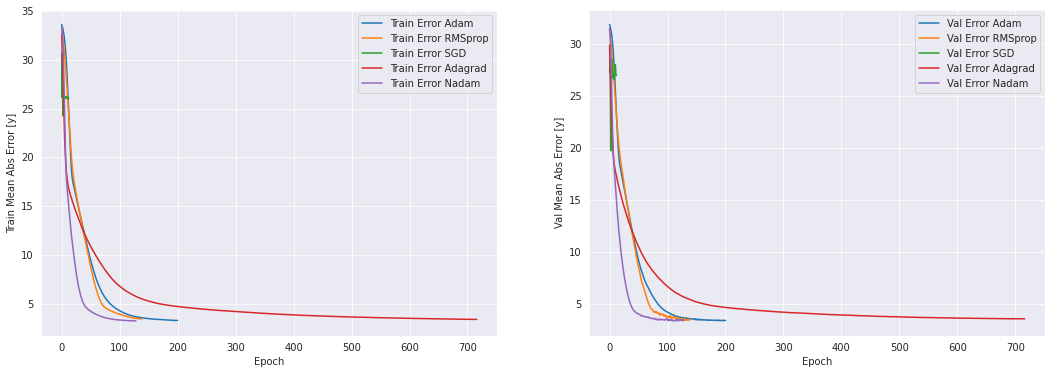

In [ ]:
def plot_history(l_hist):
    r = 1.2
    colors = ['red','blue','green']
    fig, axs = plt.subplots(1,2,figsize=(r*15,r*5)) 
  
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Train Mean Abs Error [y]')
    for i in range(len(l_hist)):
        axs[0].plot(l_hist[i]['epoch'], l_hist[i]['mae'],label='Train Error '+l_hist[i]['optimizer'][0],ls='-')
    axs[0].legend()
    #axs[0].set_xscale("log")
    #axs[0].set_yscale("log")

    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Val Mean Abs Error [y]')
    for i in range(len(l_hist)):
        axs[1].plot(l_hist[i]['epoch'], l_hist[i]['val_mae'],label = 'Val Error '+l_hist[i]['optimizer'][0],ls='-')
    axs[1].legend()
    #axs[1].set_xscale("log")
    #axs[1].set_yscale("log")

    plt.savefig('/content/drive/My Drive/Colab Notebooks/Redes Neuronales/Taller 2/output/img_regr2.png')
    plt.show()

plot_history(l_hist)